# Car data loading

In [1]:
%pylab inline
import pandas as pd
import pytz
tz_loc=pytz.timezone('Europe/Warsaw')
from haversine import haversine
import datetime

Populating the interactive namespace from numpy and matplotlib


## Loading data from CSV

In [177]:
def read_track(path):
    x=pd.read_csv(path,sep=',',index_col=0,header=0,usecols=[0,2,3])
    x.index=pd.DatetimeIndex(pd.to_datetime(x.index,errors='coerce'),tz=tz_loc).tz_convert(pytz.utc)
    x[' Longitude']=pd.to_numeric(x[' Longitude'],errors='coerce')
    x[' Latitude']=pd.to_numeric(x[' Latitude'],errors='coerce')
    return x.dropna()

In [178]:
from os import listdir
tracks=[]
for f in listdir('.'):
    if f.endswith('.csv'):
        tr=read_track(f)
        tracks.append(tr)        
tr=pd.concat(tracks)
tr=tr.sort_index()

## Compute distance from mic

In [181]:
dist=[]
mic_loc=(22.59982821,51.44127906)
for i,p in tr.iterrows():
    loc=(p[0],p[1])
    dist.append(haversine(loc,mic_loc)*1000.0)
tr['Mic dist']=pd.Series(np.array(dist),index=tr.index)

### Find locations where dist is closest to mic

In [187]:
dist=tr['Mic dist'].values
dist-=dist.min()
dist/=dist.max()

m=(dist<0.1)*1.0
minima=[]
a=np.diff(m)
s=np.nonzero(a>0)[0][:-1]
e=np.nonzero(a<0)[0]
for beg,end in zip(s,e):
        minima.append(beg+np.argmin(dist[beg:end]))
pl_min=np.zeros(dist.shape).astype('bool')
pl_min[minima]=True
tr['Closest']=pd.Series(pl_min,index=tr.index)

### Plot locations on top of distance

(1000, 2000)

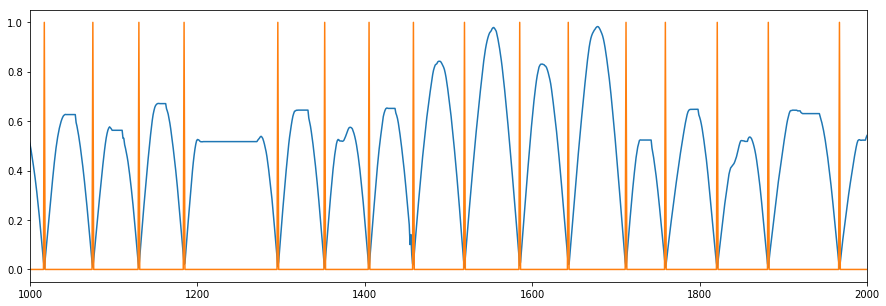

In [186]:
figure(figsize=(15,5))
plot(dist)
plot(pl_min)
p=1000
xlim(p,p+1000)

## Compute audiofile offset

In [232]:
#set position in audiofile here:
h=1
m=12
s=37
#set matching time/date
atd=datetime64('2017-03-31 09:48:00')

zerotime=atd-timedelta64(h*3600+m*60+s,'s')
a=tr.index.values-zerotime
tr['Audiofile position']=pd.Series(a,index=tr.index)

### File end

In [235]:
h=1
m=12
s=43
endtime=zerotime+timedelta64(h*3600+m*60+s,'s')

# Locations in audio where car is closest

In [242]:
sel=tr[zerotime:endtime]
sel[sel['Closest']==True]

,Longitude,Latitude,Mic dist,Closest,Audiofile position
GPS Time,,,,,
2017-03-31 08:39:26+00:00,22.599822,51.441285,0.001092,True,00:04:03
2017-03-31 08:40:39+00:00,22.599873,51.441242,0.007350,True,00:05:16
2017-03-31 08:41:34+00:00,22.599853,51.441310,0.004966,True,00:06:11
2017-03-31 08:42:28+00:00,22.599946,51.441253,0.015737,True,00:07:05
2017-03-31 08:43:20+00:00,22.599757,51.441298,0.009595,True,00:07:57
2017-03-31 08:44:15+00:00,22.599937,51.441260,0.014417,True,00:08:52
2017-03-31 08:45:06+00:00,22.599926,51.441299,0.012980,True,00:09:43
2017-03-31 08:46:11+00:00,22.599943,51.441279,0.014967,True,00:10:48
2017-03-31 08:47:06+00:00,22.599726,51.441274,0.013338,True,00:11:43


In [260]:
audiopositions=sel[sel['Closest']==True]['Audiofile position'].values
def to_int_sec(td):
    return int(td/timedelta64(1,'s'))

# Load wave file

In [315]:
import wavio
from scipy.signal import hilbert

In [312]:
y=wavio.read('Lubartow_EspaceTS_OctaviaAK_31032017_StAccDec/REC-0005_EspaceTS.WAV')

In [330]:
def load_wave(snd,point):    
    r=snd.rate
    start=(point-2)*r
    end=start+4*r
    res=snd.data[start:end,0]
    
    resH=hilbert(res)
    res=np.abs(resH)
    
    m=np.argmax(res)
    
    start=start+m-5*r
    end=start+10*r
        
    res=snd.data[start:end,:]
    
    return res[:,0],res[:,1]

## Sample extracted sample

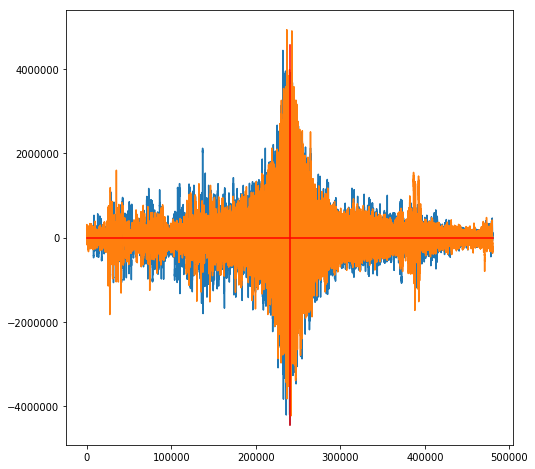

In [337]:
L,R=load_wave(y,to_int_sec(audiopositions[2]))
figure(figsize=(8,8))

plot(L)
plot(R)
mp=L.shape[0]//2
ymin=L.min()
ymax=L.max()

plot((mp,mp),(ymin,ymax),'r')
plot((0,2*mp),(0,0),'r')

## Extract all samples

In [339]:
snds=[]
for s in audiopositions:
    snds.append(load_wave(y,to_int_sec(s)))
snds=np.array(snds)
print 'Extracted {} signals with {} channels of {} samples'.format(snds.shape[0],snds.shape[1],snds.shape[2])

Extracted 60 signals with 2 channels of 480000 samples


### Draw all samples

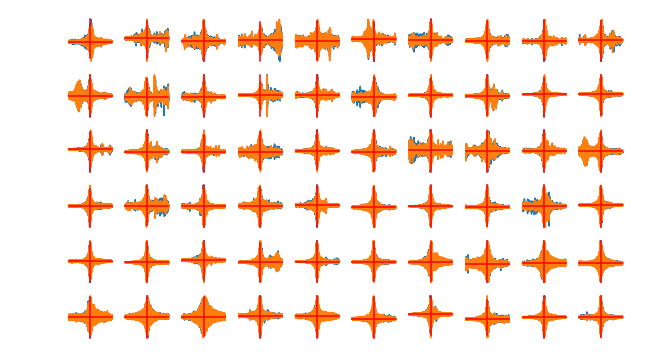

In [336]:
figure(figsize=(10,10))
ymin=-2^23
ymax=2^23-1
for s,snd in enumerate(snds):
    subplot(10,10,s+1)
    mp=snd.shape[1]//2
    ymin=snd[0].min()
    ymax=snd[0].max()
    plot(snd[0])
    plot(snd[1])
    plot((mp,mp),(ymin,ymax),'r')
    plot((0,2*mp),(0,0),'r')
#     title('{} [{}]'.format(s,secs[s]))
    axis('off')

# Save audio to files

In [340]:
%mkdir output

In [341]:
for sec,snd in zip(audiopositions,snds):
    name='output/{}.wav'.format(to_int_sec(sec))
    wavio.write(name,snd.T,48000,sampwidth=3)
    print 'Saved  '+name

Saved  output/243.wav
Saved  output/316.wav
Saved  output/371.wav
Saved  output/425.wav
Saved  output/477.wav
Saved  output/532.wav
Saved  output/583.wav
Saved  output/648.wav
Saved  output/703.wav
Saved  output/756.wav
Saved  output/809.wav
Saved  output/867.wav
Saved  output/920.wav
Saved  output/977.wav
Saved  output/1028.wav
Saved  output/1086.wav
Saved  output/1141.wav
Saved  output/1195.wav
Saved  output/1307.wav
Saved  output/1363.wav
Saved  output/1416.wav
Saved  output/1468.wav
Saved  output/1529.wav
Saved  output/1595.wav
Saved  output/1653.wav
Saved  output/1722.wav
Saved  output/1769.wav
Saved  output/1831.wav
Saved  output/1892.wav
Saved  output/1977.wav
Saved  output/2035.wav
Saved  output/2101.wav
Saved  output/2160.wav
Saved  output/2228.wav
Saved  output/2287.wav
Saved  output/2352.wav
Saved  output/2425.wav
Saved  output/2492.wav
Saved  output/2548.wav
Saved  output/2611.wav
Saved  output/2663.wav
Saved  output/2744.wav
Saved  output/2800.wav
Saved  output/2872.wav
Sa